# Electric Machinery Fundamentals 5th edition
## Chapter 4 (Code examples)

## Example 4-4
**Plot the terminal characteristics of the generator of Example 4-3 with a 0.8 PF leading and lagging load.**

Import the PyLab namespace (provides set of useful commands and constants like Pi) and reduce the *displayed* precision to four digits.

In [1]:
%pylab inline
%precision 4
%config InlineBackend.figure_formats={'svg',}  # use high quality SVG instead of PNGs

Populating the interactive namespace from numpy and matplotlib


First, initialize the current amplitudes (21 values in the range 0-60 A):

In [2]:
i_a = linspace(0, 60, 21)   # syntax: linspace(start, end, NumberOfValues)

Now initialize all other values:

In [3]:
#v_phase = zeros(1,21);
e_a = 277.0   # armature voltage
x_s = 1.0     # sychronous reactance
PF=0.8        # power factor

In [4]:
theta_rad = arccos(PF)                        # in radians
theta_lead = degrees(theta_rad)               # angle for leading power factor
theta_lagg = - degrees(theta_rad)             # angle for lagging power factor
theta = radians([[theta_lead], [theta_lagg]]) # combine both angles in an array
theta # let's see what it looks like

array([[ 0.6435],
       [-0.6435]])

In [5]:
theta_lead   # let's see what the angles look like

36.8699

In [6]:
theta_lagg   # let's see what the angles look like

-36.8699

Now calculate `v_phase` for each current level using:
$$E_A^2 = (V_\phi - X_S I_A \sin(\theta))^2  + (X_S I_A \cos(\theta))^2$$
which can be solved for the phase voltage:
$$ V_\phi = \sqrt{E_A^2 - (X_S I_A \cos(\theta))^2} + X_S I_A \sin(\theta)$$

In [7]:
v_phase = sqrt(e_a**2 -(x_s * i_a * cos(theta))**2) + (x_s * i_a * sin(theta))

Calculate terminal voltage from the phase voltage:

In [8]:
v_t = v_phase * sqrt(3)

Plot the terminal characteristic, remembering that the line current is the same as `i_a`:

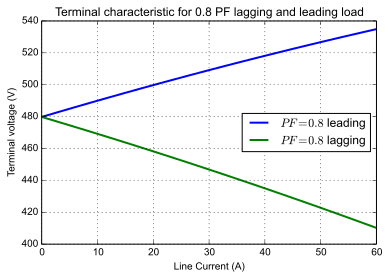

In [9]:
plot(i_a, v_t[0], i_a, v_t[1], lw=2)  # ATTENTION! Python starts array count at 0
xlabel('Line Current (A)')
ylabel('Terminal voltage (V)')
title ('Terminal characteristic for 0.8 PF lagging and leading load')
legend(('$PF = 0.8$ leading', '$PF = 0.8$ lagging'), loc=7) # loc=7 stands for centre right
grid()